In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
plt.style.use('plot.mplstyle')
from scripts.data import *
from scripts.plotting import get_gpr_data,set_axes_labels, set_axes_limits

In [4]:
def get_r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean)**2)
    ss_res = np.sum((y_true - y_pred)**2)
    return 1 - ss_res / ss_tot

atomistic R^2: 0.806
atomistic RMSE: 0.166
cg R^2: -0.868
cg RMSE: 0.479
A_cg R^2: -0.176
A_cg RMSE: 0.418


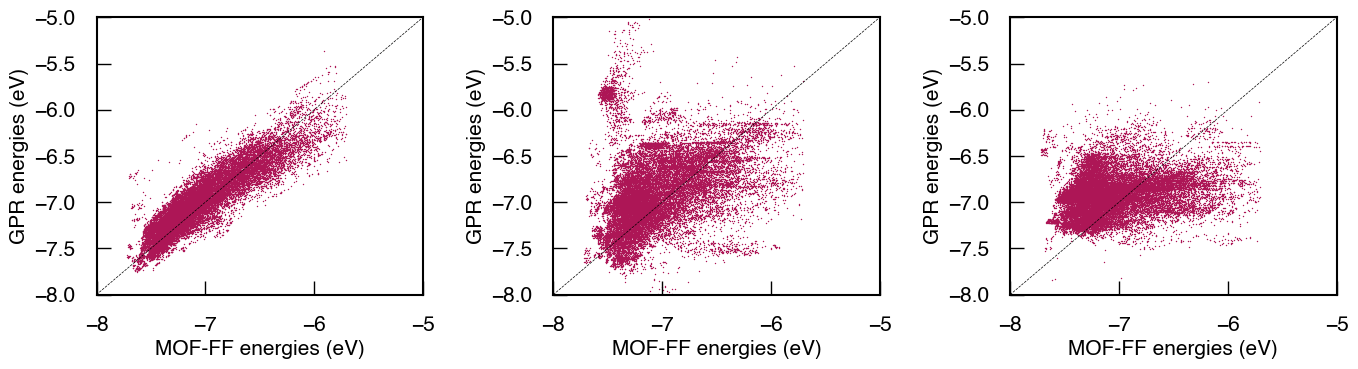

In [12]:
size = 4
fig, axs = plt.subplots(ncols=3,figsize=(4*size,size*0.9))
struct_types = ['atomistic','cg','A_cg']
colour = '#AD1656'
# hypers_type = 'A_cg'

for s, ax in zip(struct_types,axs):
    test_preds, test_labels, rmse = get_gpr_data(s,hypers_type=s,numb_train=18500,linker_type='CH3')
    r_square = get_r_squared(test_labels,test_preds)
    print(f'{s} R^2: {r_square:.3f}')
    
    set_axes_labels(ax,'MOF-FF energies (eV)','GPR energies (eV)')
    set_axes_limits(ax,-8,-5,-8,-5)

    ax.scatter(test_labels,test_preds, c=colour,linewidths=0, s= 1,rasterized=True)
    
    ax.axline((0,0),(1,1),color='k',zorder=1,linewidth=0.5,linestyle='--')
    print(f'{s} RMSE: {rmse:.3f}')


plt.subplots_adjust(wspace=0.4)
# plt.savefig('../figures/gpr_plots_FINAL.pdf',bbox_inches='tight')
    